In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the extracted data

In [214]:
data = pd.read_csv(r'/content/updata.csv', index_col=0)
data.head()

,from,to,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [215]:
# Convert the 'from' column to datetime format
data['from'] = pd.to_datetime(data['from'], format='%Y-%m-%d %H:%M:%S')

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8640 entries, 1 to 8640
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   from     8640 non-null   datetime64[ns]
 1   to       8640 non-null   object        
 2   PM10     6959 non-null   float64       
 3   PM2.5    8414 non-null   float64       
 4   NO       7271 non-null   float64       
 5   NO2      8224 non-null   float64       
 6   NOX      8225 non-null   float64       
 7   CO       8144 non-null   float64       
 8   SO2      7189 non-null   float64       
 9   NH3      8314 non-null   float64       
 10  Ozone    8187 non-null   float64       
 11  Benzene  2445 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 877.5+ KB


In [217]:
data.describe()

,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
count,8640,6959.000000,8414.000000,7271.000000,8224.000000,8225.000000,8144.000000,7189.000000,8314.000000,8187.000000,2445.000000
mean,2023-03-17 23:52:30,181.408679,75.690397,14.649636,55.757028,42.672219,1.408538,34.232731,13.242663,35.626530,0.177505
min,2023-02-01 00:00:00,12.000000,3.000000,0.100000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2023-02-23 11:56:15,84.000000,36.000000,3.900000,39.400000,25.000000,0.950000,16.100000,9.400000,10.500000,0.100000
50%,2023-03-17 23:52:30,145.000000,61.000000,6.100000,53.200000,37.700000,1.420000,25.300000,11.000000,32.400000,0.100000
75%,2023-04-09 11:48:45,238.000000,101.000000,16.500000,71.025000,53.800000,1.850000,35.200000,14.000000,58.800000,0.200000
max,2023-05-01 23:45:00,847.000000,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000
std,NaN,136.016142,55.245265,19.221385,20.231407,22.435262,0.631056,39.452131,6.151034,27.018693,0.098895


In [218]:
# deleting to column as we need only one timestamp column for to be index and we choose it to be from column
data = data.drop('to', axis=1)

In [219]:
data.head()

,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
#,,,,,,,,,,,
1,2023-02-01 00:00:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,2023-02-01 00:15:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,2023-02-01 00:30:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,2023-02-01 00:45:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,2023-02-01 01:00:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [220]:
# Simplify column names
data.columns = ['from', 'PM10', 'PM2.5', 'NO','NO2','NOX','CO','SO2','NH3','Ozone','Benzene']

In [221]:
# Impute missing values in each column with its column-specific average
# data = data.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
# Apply interpolation to numeric columns, leave others unchanged
def fill_with_avg_and_interpolate(col):
    if col.dtype in ['float64', 'int64']:  # Check if column is numeric
        col = col.interpolate(method='spline', order=2)  # Perform spline interpolation
        # Replace NaN at the start and end with the column mean
        col.fillna(col.mean(), inplace=True)
    return col

# Apply the function to all columns in the DataFrame
data = data.apply(fill_with_avg_and_interpolate)



In [223]:
data.head()

,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
#,,,,,,,,,,,
1,2023-02-01 00:00:00,95.0,35.0,14.428266,90.1,56.2,0.31,35.620127,17.7,28.1,0.4
2,2023-02-01 00:15:00,95.0,35.0,14.428266,88.0,55.1,0.33,35.620127,18.3,27.1,0.4
3,2023-02-01 00:30:00,95.0,35.0,14.428266,87.7,55.2,0.38,35.620127,19.7,24.9,0.4
4,2023-02-01 00:45:00,122.0,34.0,14.428266,88.9,55.7,0.38,35.620127,21.3,21.9,0.4
5,2023-02-01 01:00:00,122.0,34.0,14.428266,90.0,55.8,0.38,35.620127,22.3,16.7,0.4


In [224]:
data.describe()

,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
count,8640,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,2023-03-17 23:52:30,197.285400,77.018531,14.428266,55.262624,42.531893,1.407425,35.620127,13.301513,34.280920,0.160249
min,2023-02-01 00:00:00,-1229.484074,-88.291503,-17.249964,0.200000,4.200000,0.100000,-307.505189,4.600000,-162.564274,0.097637
25%,2023-02-23 11:56:15,96.000000,36.000000,4.000000,38.400000,24.800000,0.960000,17.400000,9.500000,9.700000,0.121691
50%,2023-03-17 23:52:30,156.000000,61.000000,7.500000,52.750000,37.800000,1.430000,27.700000,11.100000,31.700000,0.156391
75%,2023-04-09 11:48:45,228.000000,103.000000,14.428266,70.700000,53.825000,1.820000,35.620127,14.100000,58.125000,0.180680
max,2023-05-01 23:45:00,2504.501471,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000
std,NaN,229.919900,57.238436,17.793053,20.410363,22.283766,0.615448,41.515243,6.168759,29.499483,0.057613


## Filtering data for 1st Feb 2023 for prediction of AQI for 2nd Feb 2023

In [225]:
# Filter by a specific date (e.g., "2023-02-01")
filter_date = "2023-02-01"
filtered_data = data[data['from'].dt.date == pd.to_datetime(filter_date).date()]

In [226]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 1 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   from     96 non-null     datetime64[ns]
 1   PM10     96 non-null     float64       
 2   PM2.5    96 non-null     float64       
 3   NO       96 non-null     float64       
 4   NO2      96 non-null     float64       
 5   NOX      96 non-null     float64       
 6   CO       96 non-null     float64       
 7   SO2      96 non-null     float64       
 8   NH3      96 non-null     float64       
 9   Ozone    96 non-null     float64       
 10  Benzene  96 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 9.0 KB


In [227]:
# Save the filtered dataframe to a separate file
filtered_data.to_csv('1stFEB.csv', index=False)

In [228]:
df_new = pd.read_csv('1stFEB.csv')

## Keeping only those columns whose significane in AQI is known and best for prediction

In [229]:
columns_to_keep = ['from','PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone','NH3']
df_new = df_new[columns_to_keep]

In [230]:
df_new.head()

,from,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,2023-02-01 00:00:00,35.0,95.0,90.1,35.620127,0.31,28.1,17.7
1,2023-02-01 00:15:00,35.0,95.0,88.0,35.620127,0.33,27.1,18.3
2,2023-02-01 00:30:00,35.0,95.0,87.7,35.620127,0.38,24.9,19.7
3,2023-02-01 00:45:00,34.0,122.0,88.9,35.620127,0.38,21.9,21.3
4,2023-02-01 01:00:00,34.0,122.0,90.0,35.620127,0.38,16.7,22.3


In [231]:
df_new.isnull().sum()

,0
from,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Ozone,0
NH3,0


In [232]:
# Step 1: Convert object columns to appropriate types
df_new = df_new.infer_objects(copy=False)

# Step 2: Interpolate numeric columns
numeric_columns = df_new.select_dtypes(include=['number'])
numeric_columns.interpolate(method='spline', order=2, inplace=True)

# Step 3: Replace any remaining NaN values with column averages
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# Step 4: Update the original DataFrame
df_new[numeric_columns.columns] = numeric_columns
df_new.to_csv('1stFEB.csv', index=False)

In [233]:
df_new.isnull().sum()

,0
from,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Ozone,0
NH3,0


In [234]:
df_new.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
count,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000
mean,35.145833,114.739583,78.831797,3.562013e+01,0.449284,32.386064,22.146269
std,13.041617,64.839112,10.394908,1.428545e-14,0.223030,16.393922,2.972492
min,14.000000,58.000000,59.000000,3.562013e+01,0.100000,9.300000,17.200000
25%,23.000000,66.250000,72.675000,3.562013e+01,0.307500,17.325000,19.700000
50%,34.500000,86.500000,79.650000,3.562013e+01,0.370000,27.550000,22.500000
75%,44.000000,146.000000,88.800000,3.562013e+01,0.530000,48.750000,24.100000
max,68.000000,250.000000,93.900000,3.562013e+01,1.100000,59.800000,30.300000


## Arranging the parameters in an array for future use

In [235]:
import csv

def read_filtered_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append({
                'PM2.5': row['PM2.5'],
                'PM10': row['PM10'],
                'NO2': row['NO2'],
                'SO2': row['SO2'],
                'CO': row['CO'],
                'Ozone': row['Ozone'],
                'NH3':row['NH3']
            })
    return data

filtered_data = read_filtered_data('1stFEB.csv')
# len(filtered_data)
filtered_data

[{'PM2.5': '35.0',
  'PM10': '95.0',
  'NO2': '90.1',
  'SO2': '35.62012720150927',
  'CO': '0.31',
  'Ozone': '28.1',
  'NH3': '17.7'},
 {'PM2.5': '35.0',
  'PM10': '95.0',
  'NO2': '88.0',
  'SO2': '35.62012720150927',
  'CO': '0.33',
  'Ozone': '27.1',
  'NH3': '18.3'},
 {'PM2.5': '35.0',
  'PM10': '95.0',
  'NO2': '87.7',
  'SO2': '35.62012720150927',
  'CO': '0.38',
  'Ozone': '24.9',
  'NH3': '19.7'},
 {'PM2.5': '34.0',
  'PM10': '122.0',
  'NO2': '88.9',
  'SO2': '35.62012720150927',
  'CO': '0.38',
  'Ozone': '21.9',
  'NH3': '21.3'},
 {'PM2.5': '34.0',
  'PM10': '122.0',
  'NO2': '90.0',
  'SO2': '35.62012720150927',
  'CO': '0.38',
  'Ozone': '16.7',
  'NH3': '22.3'},
 {'PM2.5': '34.0',
  'PM10': '122.0',
  'NO2': '90.2',
  'SO2': '35.62012720150927',
  'CO': '0.37',
  'Ozone': '16.1',
  'NH3': '22.7'},
 {'PM2.5': '34.0',
  'PM10': '122.0',
  'NO2': '88.9',
  'SO2': '35.62012720150927',
  'CO': '0.34',
  'Ozone': '22.5',
  'NH3': '23.1'},
 {'PM2.5': '35.0',
  'PM10': '90.0',


## Referring to https://pib.gov.in/newsite/printrelease.aspx?relid=110654 for PM2.5, PM10, NO2, SO2, CO, ozone
I = [(IHI - ILO) / (BPHI - BPLO)] * (C - BPLO) + ILO formula AQI subindex
Identifying BPHI and BPLO for each parameter

In [236]:
max_values = df_new.max()
min_values = df_new.min()

pm25_max = max_values['PM2.5']
pm25_min = min_values['PM2.5']
pm10_max = max_values['PM10']
pm10_min = min_values['PM10']
no2_max = max_values['NO2']
no2_min = min_values['NO2']
so2_max = max_values['SO2']
so2_min = min_values['SO2']
co_max = max_values['CO']
co_min = min_values['CO']
ozone_max = max_values['Ozone']
ozone_min = min_values['Ozone']
nh3_max = max_values['NH3']
nh3_min = min_values['NH3']

In [237]:
min_max_list=[pm25_max, pm25_min, pm10_max, pm10_min, no2_max, no2_min, so2_max,so2_min,co_max, co_min, ozone_max, ozone_min, nh3_max, nh3_min ]

In [238]:
len(min_max_list)

14

In [239]:
print('PM2.5 Max:', pm25_max,"\n" , 'PM2.5 Min:', pm25_min, "\n" , 'PM10 Max:', pm10_max, "\n" ,
      'PM10 Min:', pm10_min,"\n" , 'NO2 Max:', no2_max,"\n" ,'NO2 Min:', no2_min,"\n" ,
      'SO2 Max:', so2_max,"\n" , 'SO2 Min:', so2_min, "\n" ,'CO Max:', co_max, "\n" ,
      'CO Min:', co_min, "\n" ,'Ozone Max:', ozone_max, "\n" ,'Ozone Min:', ozone_min,"\n" ,
      'NH3 Max:', nh3_max, "\n" ,'NH3 Min:', nh3_min)

PM2.5 Max: 68.0 
 PM2.5 Min: 14.0 
 PM10 Max: 250.0 
 PM10 Min: 58.0 
 NO2 Max: 93.9 
 NO2 Min: 59.0 
 SO2 Max: 35.62012720150927 
 SO2 Min: 35.62012720150927 
 CO Max: 1.1 
 CO Min: 0.1 
 Ozone Max: 59.8 
 Ozone Min: 9.3 
 NH3 Max: 30.3 
 NH3 Min: 17.2


## Identifying the average of each parameter for the day to know the IHi and ILo ranges

In [240]:
average_pm25 = df_new['PM2.5'].mean()
average_pm10 = df_new['PM10'].mean()
average_no2 = df_new['NO2'].mean()
average_so2 = df_new['SO2'].mean()

average_nh3 = df_new['NH3'].mean()

## Ozone is sampled every 8 hours, so the average of the 3 samples is taken for the day

In [241]:
df_new['from'] = pd.to_datetime(df_new['from'])
ozone_8hr_avg = df_new.set_index('from').resample('8h')['Ozone'].mean().reset_index()
print(ozone_8hr_avg)

                 from      Ozone
0 2023-02-01 00:00:00  19.009375
1 2023-02-01 08:00:00  50.842568
2 2023-02-01 16:00:00  27.306250


## CO is sampled every 8 hours, so the average of the 3 samples is taken for the day

In [242]:
df_new['from'] = pd.to_datetime(df_new['from'])
co_8hr_avg = df_new.set_index('from').resample('8h')['CO'].mean().reset_index()
print(co_8hr_avg)

                 from        CO
0 2023-02-01 00:00:00  0.377500
1 2023-02-01 08:00:00  0.326480
2 2023-02-01 16:00:00  0.643871


In [243]:
average_ozone = ozone_8hr_avg['Ozone'].mean()
average_co = co_8hr_avg['CO'].mean()
print(  "Avg O3: ", average_ozone,"\n","Avg CO: ", average_co)

Avg O3:  32.38606437498521 
 Avg CO:  0.44928351264108873


## Printing the average of each parameter for the day (except ozone and CO)

In [244]:
print("Avg PM2.5: ", average_pm25,"\n","Avg PM10: ", average_pm10,"\n","Avg NO2: ", average_no2,"\n",
      "Avg SO2: ", average_so2,"\n","Avg NH3: ", average_nh3)

Avg PM2.5:  35.145833333333336 
 Avg PM10:  114.73958333333333 
 Avg NO2:  78.83179697579168 
 Avg SO2:  35.62012720150927 
 Avg NH3:  22.1462694281358


## Calculating Subindex for each parameter

In [245]:
# Function to calculate AQI sub-index
def calculate_subindex(pollutant_data):
    """
    Calculates the AQI sub-index for a given pollutant.

    Args:
        pollutant_data: A dictionary containing the pollutant's concentration (C),
                        breakpoint values (BPHI, BPLO), and index limits (IHi, ILo).

    Returns:
        The calculated AQI sub-index.
    """
    C = pollutant_data["C"]
    BPHI = pollutant_data["BPHI"]
    BPLO = pollutant_data["BPLO"]
    IHi = pollutant_data["IHi"]
    ILo = pollutant_data["ILo"]

    # AQI formula
    subindex = ((IHi - ILo) / (BPHI - BPLO)) * (C - BPLO) + ILo
    return round(subindex, 2)  # Round to two decimal places


# Breakpoints (from the provided https://pib.gov.in/newsite/printrelease.aspx?relid=110654)
breakpoints = {
    "PM2.5": {"C": average_pm25, "BPHI": 250, "BPLO": 121, "IHi": 400, "ILo": 301},
    "PM10": {"C": average_pm10, "BPHI": 350, "BPLO": 251, "IHi": 300, "ILo": 201},
    "NO2": {"C": average_no2, "BPHI": 80, "BPLO": 41, "IHi": 100, "ILo": 51},
    "SO2": {"C": average_so2, "BPHI": 40, "BPLO": 0, "IHi": 50, "ILo": 0},
    "NH3": {"C": average_nh3, "BPHI": 200, "BPLO": 0, "IHi": 50, "ILo": 0},
    "O3": {"C": average_ozone, "BPHI": 50, "BPLO": 0, "IHi": 50, "ILo": 0},
    "CO": {"C": average_co, "BPHI": 10, "BPLO": 2.1, "IHi": 200, "ILo": 101},
}

# Calculate and print AQI sub-indexes
print("\nCalculating Subindex for each parameter:")
subindexes = {}
for pollutant, data in breakpoints.items():
    subindex = calculate_subindex(data)
    subindexes[pollutant] = subindex
    print(f"{pollutant}: {subindex}")

# Identify the pollutant with the highest AQI
max_aqi_pollutant = max(subindexes, key=subindexes.get)
print(
    f"\nThe pollutant with the highest AQI is {max_aqi_pollutant} "
    f"with a sub-index of {subindexes[max_aqi_pollutant]}."
)
print(f"Declare the AQI based on {max_aqi_pollutant}.")



Calculating Subindex for each parameter:
PM2.5: 235.11
PM10: 64.74
NO2: 98.53
SO2: 44.53
NH3: 5.54
O3: 32.39
CO: 80.31

The pollutant with the highest AQI is PM2.5 with a sub-index of 235.11.
Declare the AQI based on PM2.5.


## AQI for 1st February 2023 is 317.58 (worst sub index is the AQI)

### Simple analysis for 1st February 2023

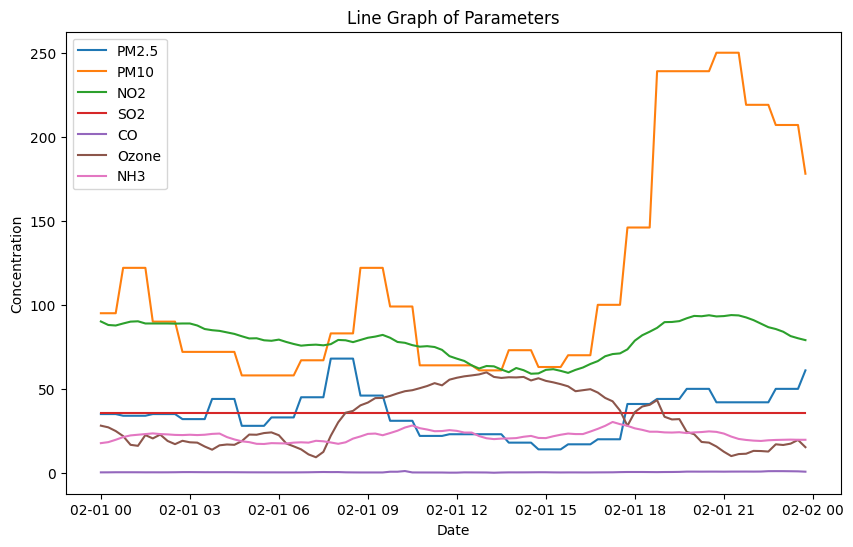

In [246]:
#  Plotting line graph for each parameter
plt.figure(figsize=(10, 6))

# PM2.5
plt.plot(df_new['from'], df_new['PM2.5'], label='PM2.5')

# PM10
plt.plot(df_new['from'], df_new['PM10'], label='PM10')

# NO2
plt.plot(df_new['from'], df_new['NO2'], label='NO2')

# SO2
plt.plot(df_new['from'], df_new['SO2'], label='SO2')

# CO
plt.plot(df_new['from'], df_new['CO'], label='CO')

# Ozone
plt.plot(df_new['from'], df_new['Ozone'], label='Ozone')

# NH3
plt.plot(df_new['from'], df_new['NH3'], label='NH3')

# Set x-axis label
plt.xlabel('Date')

# Set y-axis label
plt.ylabel('Concentration')

# Set title
plt.title('Line Graph of Parameters')

# Add legend
plt.legend()

# Show the plot
plt.show()